In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSVファイルを読み込み、最初の列をインデックスとして設定
file_path = '/content/microbiome_level5_counts.csv'
df = pd.read_csv(file_path, index_col=0)

# 各行を百分率化し、合計値を100に揃える
df = df.apply(lambda x: x*100 / x.sum(), axis=1)

# インデックス列を基に新しい group 列を追加
df['group'] = df.index.str.split('_').str[0]

# dfを表示
df

,d__Bacteria;p__Campylobacterota;c__Campylobacteria;o__Campylobacterales;f__Campylobacteraceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales_A_737866;f__Succinivibrionaceae,d__Bacteria;p__Firmicutes_A;c__Clostridia_258483;o__Lachnospirales;f__Lachnospiraceae,d__Bacteria;p__Firmicutes_A;c__Clostridia_258483;o__Christensenellales;f__GCA-900066905,d__Bacteria;p__Firmicutes_A;c__Clostridia_258483;o__Christensenellales;f__CAG-138,d__Bacteria;p__Firmicutes_D;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae,d__Bacteria;p__Firmicutes_D;c__Bacilli;o__Bacillales_B_306089;f__Bacillaceae_H_294103,d__Bacteria;p__Firmicutes_D;c__Bacilli;o__Lactobacillales;__,d__Bacteria;p__Firmicutes_D;c__Bacilli;o__Staphylococcales;f__Gemellaceae,d__Bacteria;__;__;__;__,...,d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Atopobiaceae,d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Eggerthellaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales_592524;f__Burkholderiaceae_A_580492,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales_595427;f__Burkholderiaceae_A_595427,d__Bacteria;p__Firmicutes_A;c__Clostridia_258483;o__Peptostreptococcales;f__Filifactoraceae_235894,d__Bacteria;p__Firmicutes_A;c__Clostridia_258483;o__Oscillospirales;f__QAKW01,d__Bacteria;p__Firmicutes_A;c__Clostridia_258483;o__Acetivibrionales;__,d__Bacteria;p__Firmicutes_D;c__Bacilli;o__RF39;f__UBA660,group
SampleID,,,,,,,,,,,,,,,,,,,,,
CTRL_feces_028,0.000000,0.000000,44.304729,0.000000,0.000000,9.157824,0.036803,0.030669,0.000000,0.251487,...,0.042937,7.041649,0.355763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CTRL
CTRL_feces_099,0.000000,0.000000,25.595061,0.000000,0.000000,2.111986,0.000000,0.000000,0.000000,0.170321,...,0.000000,0.000000,0.400255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CTRL
CTRL_feces_100,0.000000,0.000000,43.812429,0.000000,0.011437,5.680518,0.000000,0.015250,0.000000,1.223790,...,0.000000,3.408311,0.411742,0.000000,0.026687,0.000000,0.000000,0.000000,0.000000,CTRL
CTRL_feces_115,0.000000,0.000000,43.983679,0.000000,0.000000,1.124157,0.000000,0.008327,0.000000,0.915980,...,0.029145,3.522358,0.520443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CTRL
CTRL_feces_118,0.000000,0.000000,34.845206,0.000000,0.136445,2.267808,0.000000,0.000000,0.000000,4.455632,...,0.183495,2.394843,1.119789,0.000000,0.000000,0.000000,0.000000,0.023525,0.032935,CTRL
CTRL_feces_144,0.000000,0.000000,23.102912,0.000000,0.000000,2.525875,0.000000,0.000000,0.026814,0.498740,...,1.142275,11.642623,0.321768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CTRL
CTRL_feces_161,0.000000,0.000000,11.719924,0.000000,0.000000,1.612742,0.000000,0.000000,0.030051,1.732946,...,0.000000,7.552840,0.370630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CTRL
CTRL_feces_184,0.000000,0.000000,19.205475,0.000000,0.000000,0.208523,0.000000,0.000000,0.000000,1.587981,...,0.000000,5.646153,0.935679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CTRL
CTRL_feces_207,0.000000,0.050251,5.163317,0.000000,0.000000,7.851759,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.138191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CTRL


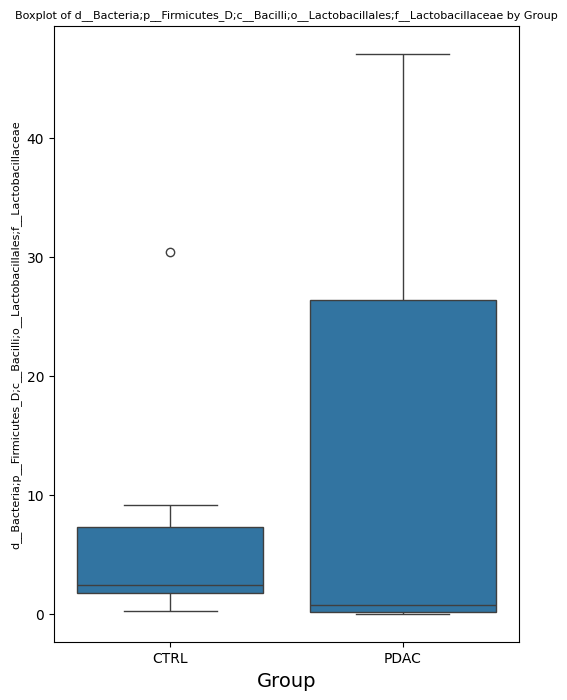

In [2]:
# 箱ひげ図を作成する列の名前
target_column = 'd__Bacteria;p__Firmicutes_D;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae'

# 箱ひげ図を作成
plt.figure(figsize=(6, 8))
sns.boxplot(x='group', y=target_column, data=df)
plt.xlabel('Group', fontsize=14)
plt.ylabel(target_column, fontsize=8)

plt.title(f'Boxplot of {target_column} by Group', fontsize=8)
plt.show()

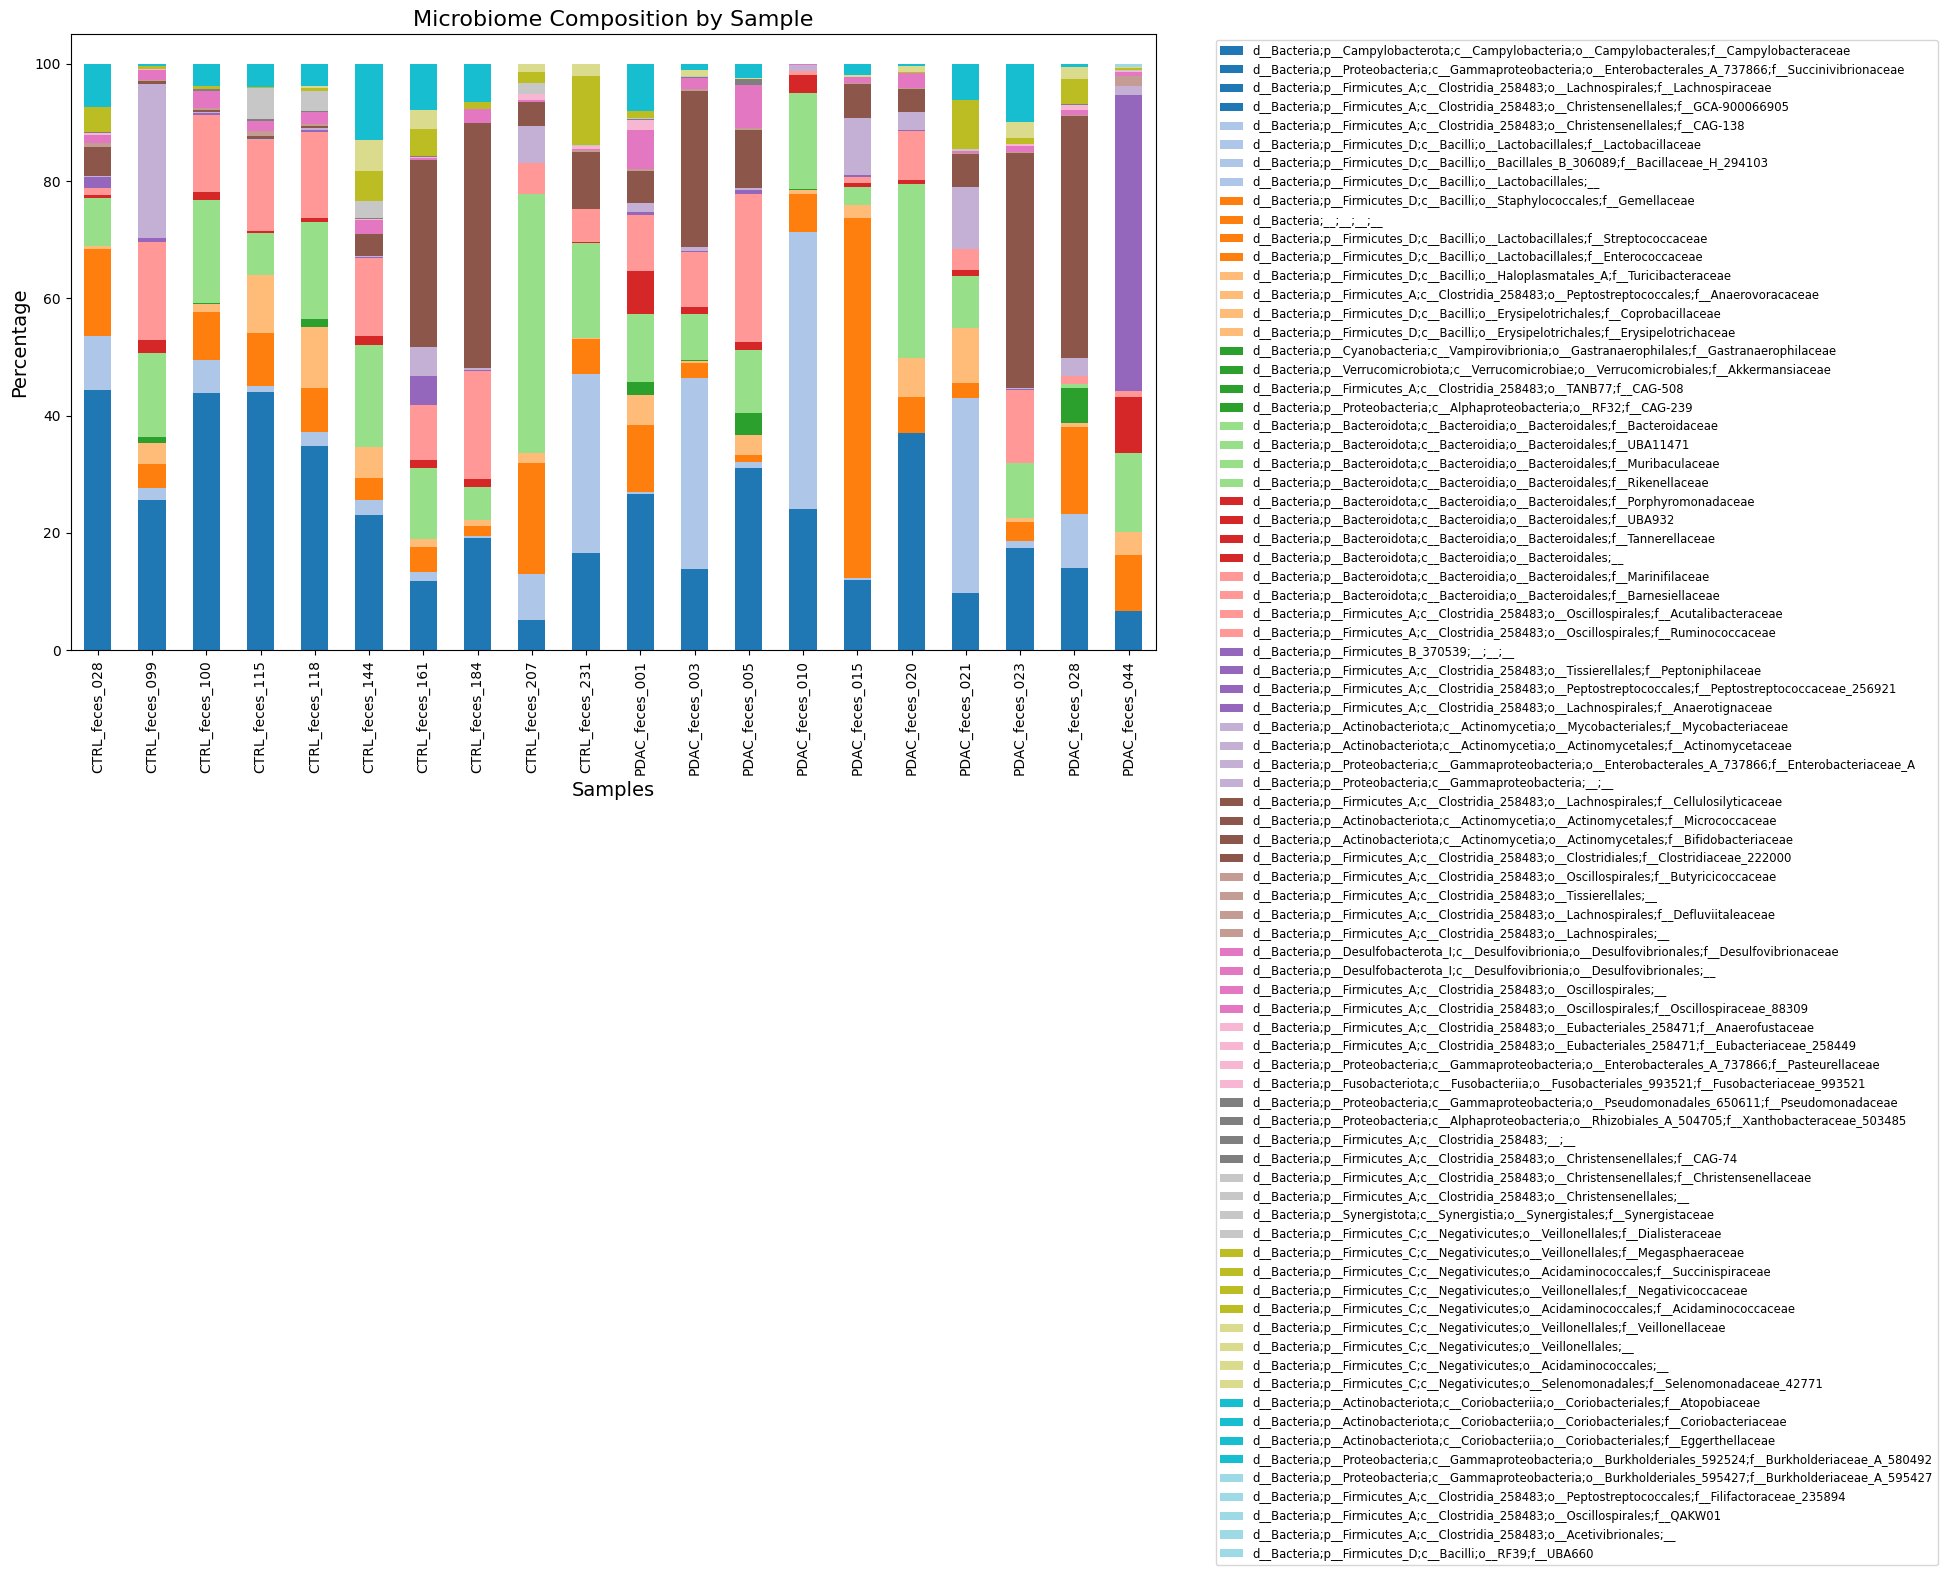

In [3]:
# 積み上げ棒グラフを作成（group列は除外）
df_percentage_no_group = df.drop(columns=['group'])
df_percentage_no_group.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

plt.xlabel('Samples', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Microbiome Composition by Sample', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()
